In [1]:
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize']=20,10

In [3]:
import missingno as mo
import seaborn as sns
sns.set()

In [59]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('C:/Users/biju/Documents/timeseries/nse_data.csv')

In [5]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846399,False,False,False,False,False,False,False,False,False,False,False,False,False
846400,False,False,False,False,False,False,False,False,False,False,False,False,False
846401,False,False,False,False,False,False,False,False,False,False,False,False,False
846402,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
np.where(pd.isnull(df))

(array([   614,    634,    656, ..., 845263, 845320, 845675], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

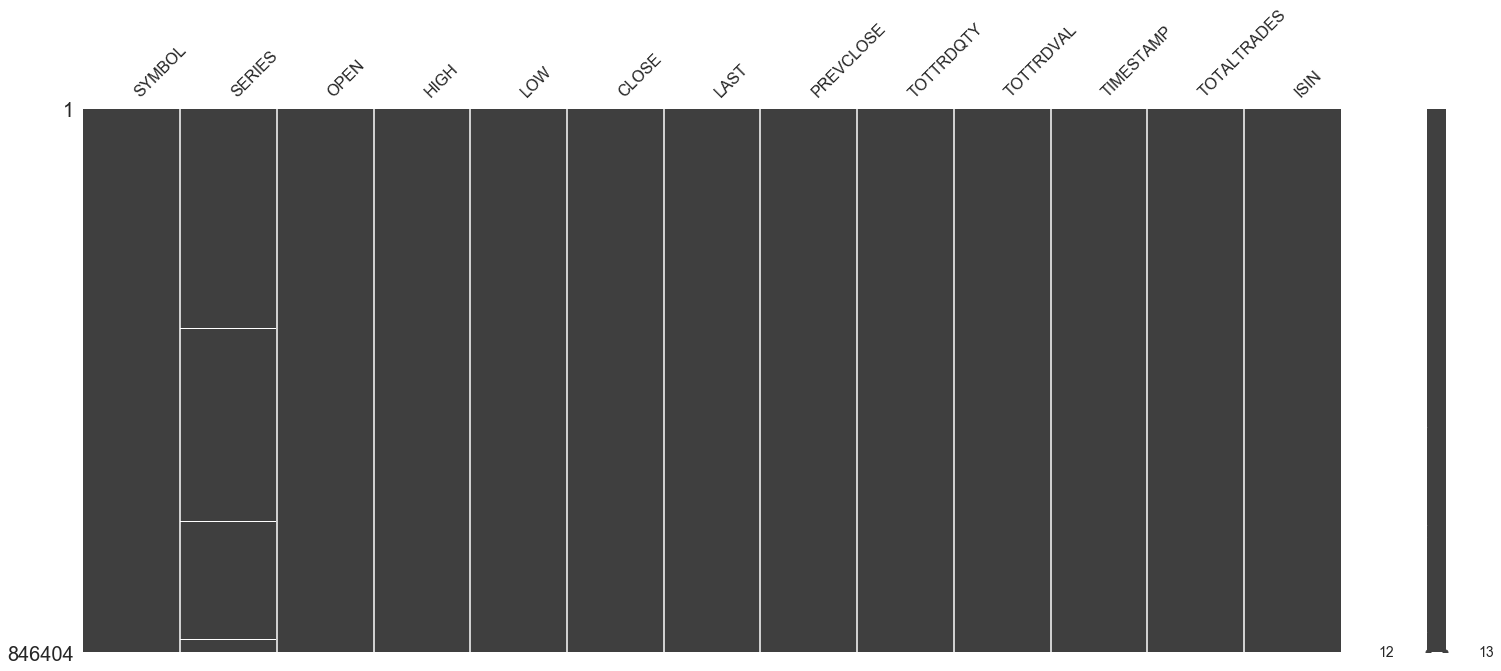

In [9]:
mo.matrix(df)

In [10]:
print(df.loc[[614]])

         SYMBOL SERIES    OPEN     HIGH     LOW    CLOSE     LAST  PREVCLOSE  \
614  IBULHSGFIN    NaN  1075.0  1084.99  1075.0  1084.99  1084.99     1075.0   

     TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
614         21   22584.99  2017-06-28            2  INE148I07GL3  


In [11]:
print(df.loc[[634]])

       SYMBOL SERIES     OPEN    HIGH      LOW   CLOSE    LAST  PREVCLOSE  \
634  IDFCBANK    NaN  7905.05  7916.0  7905.05  7916.0  7916.0     7921.0   

     TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
634         16   126588.2  2017-06-28            4  INE092T08CL7  


In [12]:
df.isnull().sum()

SYMBOL            0
SERIES         2457
OPEN              0
HIGH              0
LOW               0
CLOSE             0
LAST              0
PREVCLOSE         0
TOTTRDQTY         0
TOTTRDVAL         0
TIMESTAMP         0
TOTALTRADES       0
ISIN              0
dtype: int64

In [13]:
df['SERIES'].unique()

array(['EQ', 'BZ', 'BE', 'SM', 'N1', 'N6', 'N8', 'NC', 'NH', 'NN', 'NP',
       'N3', 'N2', 'N5', 'IL', 'W2', 'N9', 'ND', 'NE', nan, 'N4', 'N7',
       'NB', 'NJ', 'NK', 'NL', 'IV', 'NO', 'P2', 'MF', 'P1', 'NF', 'NI',
       'GB', 'NG', 'NZ', 'Y8', 'YA', 'YB', 'NS', 'NU', 'NW', 'NX', 'Y3',
       'Y6', 'Y9', 'DR', 'Q1', 'IT', 'NM', 'D1', 'NR', 'Y1', 'Y5', 'BL',
       'Y2', 'YC', 'Y7', 'YG', 'Q2', 'NT', 'HB', 'HC', 'YD', 'NV', 'NY',
       'NQ', 'Y4', 'HE', 'H6', 'HA', 'BT'], dtype=object)

In [14]:
df_1 = df.drop(columns=['SERIES'], axis=1)

In [15]:
df_1.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [16]:
df.TIMESTAMP.values

array(['2017-06-28', '2017-06-28', '2017-06-28', ..., '2017-12-29',
       '2017-12-29', '2017-12-29'], dtype=object)

In [17]:
df_1['TIME_STAMP'] = pd.to_datetime(df_1['TIMESTAMP'],format='%Y-%m-%d')

In [18]:
df_1.TIME_STAMP.values

array(['2017-06-28T00:00:00.000000000', '2017-06-28T00:00:00.000000000',
       '2017-06-28T00:00:00.000000000', ...,
       '2017-12-29T00:00:00.000000000', '2017-12-29T00:00:00.000000000',
       '2017-12-29T00:00:00.000000000'], dtype='datetime64[ns]')

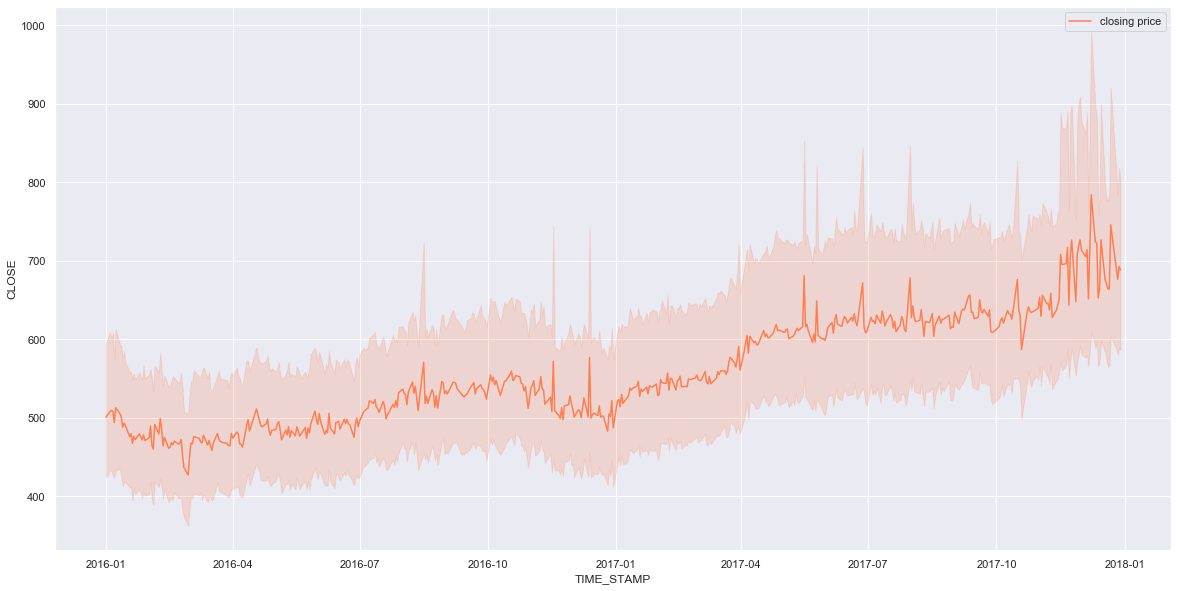

In [19]:
sns.lineplot(x = df_1['TIME_STAMP'], y=df_1['CLOSE'], color="coral", label="closing price")

In [20]:
df_1['TIME_STAMP'].describe()

count                  846404
unique                    495
top       2017-12-26 00:00:00
freq                     1860
first     2016-01-01 00:00:00
last      2017-12-29 00:00:00
Name: TIME_STAMP, dtype: object

In [21]:
df_1.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,TIME_STAMP
0,20MICRONS,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027,2017-06-28
1,3IINFOTECH,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020,2017-06-28
2,3MINDIA,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017,2017-06-28
3,63MOONS,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023,2017-06-28
4,8KMILES,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021,2017-06-28


In [22]:
df_1.index

RangeIndex(start=0, stop=846404, step=1)

In [23]:
df_1 = df_1.sort_index(ascending=True, axis=0)

In [24]:
df_1.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,TIME_STAMP
0,20MICRONS,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027,2017-06-28
1,3IINFOTECH,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020,2017-06-28
2,3MINDIA,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017,2017-06-28
3,63MOONS,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023,2017-06-28
4,8KMILES,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021,2017-06-28


In [25]:
df_2 = df_1.drop(columns=['TIMESTAMP'], axis=1)

In [26]:
df_2.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,TIME_STAMP
0,20MICRONS,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,202,INE144J01027,2017-06-28
1,3IINFOTECH,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,7353,INE748C01020,2017-06-28
2,3MINDIA,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,748,INE470A01017,2017-06-28
3,63MOONS,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,437,INE111B01023,2017-06-28
4,8KMILES,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,1866,INE650K01021,2017-06-28


In [27]:
df_rsme = df_2.filter(['TIME_STAMP', 'CLOSE'], axis=1)

In [28]:
df_rsme.head()

,TIME_STAMP,CLOSE
0,2017-06-28,36.85
1,2017-06-28,4.55
2,2017-06-28,13266.70
3,2017-06-28,61.00
4,2017-06-28,537.45


In [29]:
df_rsme.sort_values(by=['TIME_STAMP'], inplace=True)

In [30]:
df_rsme.head()

,TIME_STAMP,CLOSE
648190,2016-01-01,34.05
648030,2016-01-01,20.10
648031,2016-01-01,2276.55
648032,2016-01-01,4.95
648033,2016-01-01,103.65


In [31]:
df_rsme = df_rsme.reset_index(drop=True)

In [32]:
df_rsme.head()

,TIME_STAMP,CLOSE
0,2016-01-01,34.05
1,2016-01-01,20.10
2,2016-01-01,2276.55
3,2016-01-01,4.95
4,2016-01-01,103.65


In [33]:
len(df_rsme)

846404

In [34]:
X_train = df_rsme[:746404]
X_test = df_rsme[746404:]

In [35]:
X_train.head()

,TIME_STAMP,CLOSE
0,2016-01-01,34.05
1,2016-01-01,20.10
2,2016-01-01,2276.55
3,2016-01-01,4.95
4,2016-01-01,103.65


In [36]:
values = []
filter_idx = len(X_train)-len(X_test)
print(filter_idx)

646404


In [37]:
for row in range(0, len(X_test)):
    summation = X_train['CLOSE'][filter_idx+row:].sum() + sum(values)
    mean = summation/len(X_test)
    values.append(mean)

In [38]:
def rmse(df, predictions):
    '''
    Predictions: A list of values
    '''
    # Subtract the values from df column with predicted values from training set and calculate power.
    diff = np.power((np.array(df['CLOSE'])-predictions),2)
    # Calculate mean
    avg = np.mean(diff)
    # Calculate square root
    sqrt = np.sqrt(avg)
    
    return sqrt

In [39]:
print(max(values))
print(min(values))
print(len(values))

630.7799969662882
626.7603708118437
100000


In [40]:
rmse_value = rmse(X_test, values)

In [41]:
rmse_value

2732.403846893084

In [42]:
X_test['pred_values'] = values

c:\users\biju\.conda\envs\py363\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
X_test

,TIME_STAMP,CLOSE,pred_values
746404,2017-10-11,48.75,627.605524
746405,2017-10-11,588.40,627.610945
746406,2017-10-11,482.70,627.617172
746407,2017-10-11,1055.00,627.623412
746408,2017-10-11,1825.00,627.629515
...,...,...,...
846399,2017-12-29,148.00,628.588863
846400,2017-12-29,153.10,628.587700
846401,2017-12-29,2336.35,628.593068
846402,2017-12-29,65.55,628.597064


In [44]:
X_test = X_test.reset_index(drop=True)
X_test.head()

,TIME_STAMP,CLOSE,pred_values
0,2017-10-11,48.75,627.605524
1,2017-10-11,588.40,627.610945
2,2017-10-11,482.70,627.617172
3,2017-10-11,1055.00,627.623412
4,2017-10-11,1825.00,627.629515


In [46]:
X_train = X_train.reset_index(drop=True)
X_train.head()

,TIME_STAMP,CLOSE
0,2016-01-01,34.05
1,2016-01-01,20.10
2,2016-01-01,2276.55
3,2016-01-01,4.95
4,2016-01-01,103.65


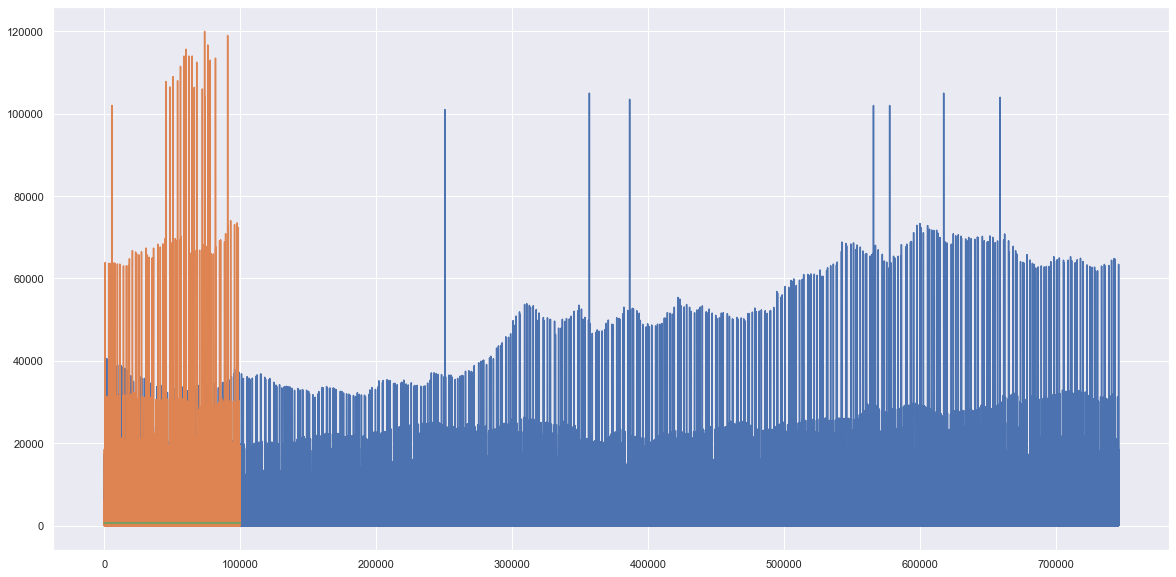

In [58]:
plt.plot(X_train['CLOSE'])
plt.plot(X_test[['CLOSE', 'pred_values']])

In [60]:
scale = MinMaxScaler(feature_range=(0,1))

In [62]:
X_train

,TIME_STAMP,CLOSE
0,2016-01-01,34.05
1,2016-01-01,20.10
2,2016-01-01,2276.55
3,2016-01-01,4.95
4,2016-01-01,103.65
...,...,...
746399,2017-10-11,744.85
746400,2017-10-11,91.85
746401,2017-10-11,229.00
746402,2017-10-11,128.60


In [64]:
df_knn = df_1.drop(columns=['TIMESTAMP', 'TIME_STAMP', 'ISIN'])

In [70]:
df_knn = df_knn.drop(columns=['SYMBOL'])

In [75]:
df_knn.head()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
0,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,202
1,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,7353
2,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,748
3,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,437
4,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,1866


In [77]:
x_data = df_knn.drop(columns=['CLOSE'])

In [79]:
x_data.head()

,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
0,37.80,37.80,36.15,37.40,37.05,27130,994657.90,202
1,4.10,4.85,4.00,4.65,4.05,20157058,92148517.65,7353
2,13425.15,13469.55,12920.00,13300.00,13460.55,2290,30304923.35,748
3,61.00,61.90,60.35,61.10,60.65,27701,1689421.00,437
4,546.10,548.00,535.00,535.20,547.45,79722,43208620.05,1866


In [88]:
y_data = df_knn['CLOSE']

In [92]:
y_data.head()

0      36.85
1       4.55
2    13266.7
3         61
4     537.45
Name: CLOSE, dtype: object

In [93]:
x_t = scale.fit_transform(x_data)
x_train = pd.DataFrame(x_data)
# x_v = scale.fit_transform(test_knn)
# x_test = pd.DataFrame(x_v)

In [97]:
grid = {'n_neighbours':[2,3,4,5,6,7,8,9,10,11,12]}

In [98]:
knn_obj = neighbors.KNeighborsRegressor()
model= GridSearchCV(estimator=knn_obj, param_grid=grid,cv=3)

In [99]:
model.fit(x_train, y_data)

ValueError: Found input variables with inconsistent numbers of samples: [846404, 846405]